## Hamburger Unternehmen: Fundamentalanalyse

Der HASPAX Index listet 22 börsennotierte Unternehmen aus Hamburg und der nahen Umgebung.
https://www.boersenag.de/Index/DE0008468810/Haspax

Als Fundamentalanalyse bezeichnet man einen Blick auf zentrale wirtschaftliche Kennzahlen. Bei börsennotierten Unternehmen sind diese öffentlich einsehbar. Als Datenquelle in diesem Notebook dient boerse.de. Die Daten greifen wir direkt aus dem HTMl ab.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline

In [5]:
!pip install lxml

     |████████████████████████████████| 4.4 MB 2.6 MB/s eta 0:00:01
You should consider upgrading via the '/Users/flo/projects/data-playground/venv/bin/python3 -m pip install --upgrade pip' command.


In [10]:
# FIXME: missing the German numerical convention ("23,00" is interpreted as `2300` when it should be `23.00` instead)
# Idea: 
# - Use requests.get() instead to load the HTML
# - preprocess the table contents (remove `.` and replace `,` with `.`)
# - pass the html string to pd.read_html()
tables = pd.read_html(
    'https://www.boerse.de/fundamental-analyse/Alstria-Office-REIT--Aktie/DE000A0LD2U1',
    # Support German dates
    thousands='.',
    decimal=',',
    na_values=['-']
)

In [11]:
# add years to KGV table, because html table is missing the header
tables[7].columns = tables[6].columns
tables[7]

,Unnamed: 0,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,KGV (Kurs-Gewinn-Verhältnis),23.00,18.1,18.70,21.90,NaN,10.30,6.60,4.00,5.10
1,KBV (Kurs-Buchwert-Verhältnis),NaN,NaN,NaN,NaN,1.16,1.06,1.02,0.81,0.94
2,KUV (Kurs-Umsatz-Verhältnis),7.26,7.2,6.93,7.99,16.26,9.00,10.25,11.20,15.86


In [12]:
# verify shapes are compatible for concatenation
for i, tab in enumerate(tables[4:]):
    print(i, tab.shape)

0 (5, 10)
1 (12, 10)
2 (5, 10)
3 (3, 10)
4 (4, 10)
5 (3, 10)


In [35]:
# gewinn_und_verlust = tables[4]
# bilanz = tables[5]
# aktien_kennzahlen = tables[6]
# kgv_kbv_kuv = tables[7]
# rentabilitaet = tables[8]    
# personal = tables[9]
fundamental = pd.concat(tables[4:], ignore_index=True)  # skip first 3 non-data tables 
fundamental = fundamental.rename({'Unnamed: 0': 'Kennzahl'}, axis='columns')
fundamental = fundamental.dropna()
fundamental = fundamental.set_index('Kennzahl')
fundamental


,2011,2012,2013,2014,2015,2016,2017,2018,2019
Kennzahl,,,,,,,,,
Umsatz,91,101,104,102,115,203,194,193,188
Operatives Ergebnis (EBIT),53,78,85,87,-63,247,348,555,608
Ergebnis vor Steuer (EBT),27,40,39,37,-111,194,299,528,580
Jahresüberschuss,27,40,39,37,-111,177,297,527,581
Dividendenausschüttung,35,39,39,43,77,80,80,92,92
Umlaufvermögen,107,140,94,77,552,311,184,178,531
Anlagevermögen,1579,1647,1692,1692,3299,3072,3400,4004,4498
Summe Aktiva,1687,1787,1786,1769,3851,3383,3584,4181,5029
Kurzfristige Verbindlichkeiten,21,28,89,30,449,105,188,91,109


In [38]:
# def convert_percent_str(num_str):
#     """
#     Converts str '-2,89%' into float `-.0289`
#     Converts str '12,61%' into float `-.1261`
#     Only affects strings that contain '%'
#     """
#     if not type(num_str) == str or not '%' in num_str:
#         return num_str
#     return float(num_str.replace(',', '.').replace('%', '')) / 100
# convert_percent_str('-2,89%')
def convert_percent_series(series):
    return series.str.replace(',', '.').str.replace('%', '').astype('float') / 100

rows_with_percent = ['Umsatzrendite', 'Gesamtkapitalrendite', 'Dividendenrendite']
fundamental.loc[rows_with_percent] = (
    fundamental.loc[rows_with_percent]
    .apply(convert_percent_series, axis=0)
)


fundamental

,2011,2012,2013,2014,2015,2016,2017,2018,2019
Kennzahl,,,,,,,,,
Umsatz,91,101,104,102,115,203,194,193,188
Operatives Ergebnis (EBIT),53,78,85,87,-63,247,348,555,608
Ergebnis vor Steuer (EBT),27,40,39,37,-111,194,299,528,580
Jahresüberschuss,27,40,39,37,-111,177,297,527,581
Dividendenausschüttung,35,39,39,43,77,80,80,92,92
Umlaufvermögen,107,140,94,77,552,311,184,178,531
Anlagevermögen,1579,1647,1692,1692,3299,3072,3400,4004,4498
Summe Aktiva,1687,1787,1786,1769,3851,3383,3584,4181,5029
Kurzfristige Verbindlichkeiten,21,28,89,30,449,105,188,91,109


In [39]:
fund_T = fundamental.transpose()
fund_T

Kennzahl,Umsatz,Operatives Ergebnis (EBIT),Ergebnis vor Steuer (EBT),Jahresüberschuss,Dividendenausschüttung,Umlaufvermögen,Anlagevermögen,Summe Aktiva,Kurzfristige Verbindlichkeiten,Langfristige Verbindlichkeiten,...,Gewinn je Aktie (verwässert),Umsatz je Aktie,Dividende je Aktie,KUV (Kurs-Umsatz-Verhältnis),Umsatzrendite,Gesamtkapitalrendite,Dividendenrendite,Personal am Jahresende,Umsatz je Mitarbeiter,Gewinn je Mitarbeiter
2011,91,53,27,27,35,107,1579,1687,21,897,...,0.4,1.27,0.44,7.26,0.3018,0.0162,0.0478,50,1815960,548000
2012,101,78,40,40,39,140,1647,1787,28,930,...,0.51,1.28,0.5,7.2,0.3939,0.0223,0.0541,59,1716949,676271
2013,104,85,39,39,39,94,1692,1786,89,853,...,0.46,1.32,0.5,6.93,0.3733,0.0218,0.0546,63,1653968,617460
2014,102,87,37,37,43,77,1692,1769,30,893,...,0.45,1.29,0.5,7.99,0.3635,0.0209,0.0485,63,1615587,587302
2015,115,-63,-111,-111,77,552,3299,3851,449,1744,...,-1.04,0.76,0.5,16.26,-0.9662,-0.0289,0.0406,93,1240183,-1197849
2016,203,247,194,177,80,311,3072,3383,105,1549,...,1.11,1.32,0.52,9,0.8727,0.0523,0.0437,105,1930124,1684762
2017,194,348,299,297,80,184,3400,3584,188,1442,...,1.85,1.26,0.52,10.25,1.5333,0.0829,0.0403,118,1641356,2516949
2018,193,555,528,527,92,178,4004,4181,91,1406,...,3,1.09,0.52,11.2,2.7298,0.1261,0.0426,139,1389878,3794245
2019,188,608,580,581,92,531,4498,5029,109,1744,...,3.27,1.06,0.52,15.86,3.0997,0.1156,0.031,156,1201712,3725641


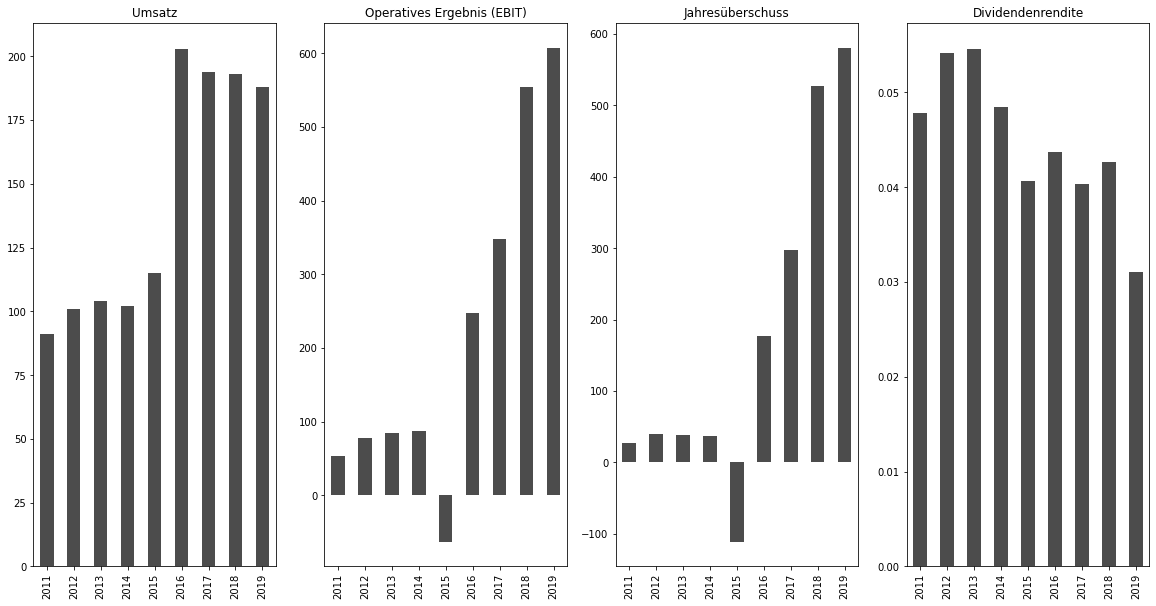

In [40]:
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
for i, kennzahl in enumerate([
        'Umsatz',
        'Operatives Ergebnis (EBIT)',
        'Jahresüberschuss',
        'Dividendenrendite'
    ]):
    
    fund_T[kennzahl].plot.bar(
        ax=axes[i],
        color='k',
        alpha=.7,
        title=kennzahl)